<a href="https://colab.research.google.com/github/Daku-on/qiita_article/blob/main/%E3%83%9D%E3%82%B1%E3%83%9D%E3%82%B1%E5%8B%9D%E8%B2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Round 1:
  Player 1: 0 wins, Not Cleared
  Player 2: 0 wins, Not Cleared
  Player 3: 0 wins, Not Cleared
  Player 4: 0 wins, Not Cleared
  Player 5: 0 wins, Not Cleared
  Player 6: 1 wins, Not Cleared
  Player 7: 1 wins, Not Cleared
  Player 8: 0 wins, Not Cleared
  Player 9: 1 wins, Not Cleared
  Player 10: 1 wins, Not Cleared
  Player 11: 0 wins, Not Cleared
  Player 12: 1 wins, Not Cleared
  Player 13: 1 wins, Not Cleared
  Player 14: 1 wins, Not Cleared
  Player 15: 0 wins, Not Cleared
  Player 16: 0 wins, Not Cleared
  Player 17: 1 wins, Not Cleared
  Player 18: 1 wins, Not Cleared
  Player 19: 0 wins, Not Cleared
  Player 20: 1 wins, Not Cleared
  Player 21: 0 wins, Not Cleared
  Player 22: 0 wins, Not Cleared
  Player 23: 0 wins, Not Cleared
  Player 24: 0 wins, Not Cleared
  Player 25: 1 wins, Not Cleared
  Player 26: 0 wins, Not Cleared
  Player 27: 1 wins, Not Cleared
  Player 28: 0 wins, Not Cleared
  Player 29: 0 wins, Not Cleared
  Player 30: 1 wins, Not Cleared
  Player 3

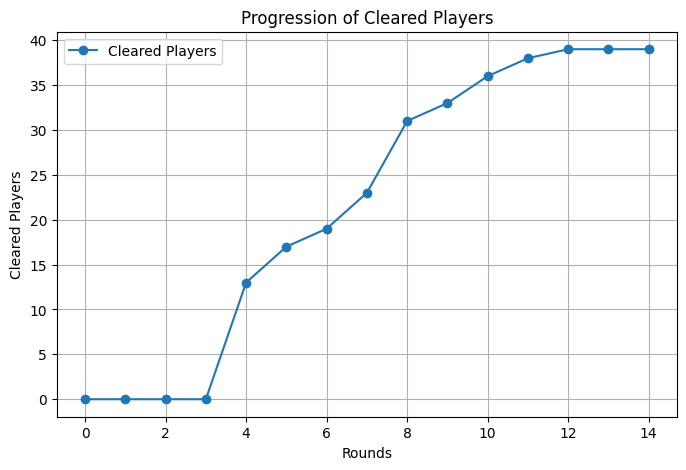

Total rounds: 15
Total battles: 174
Average battles per player: 3.48


In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_PLAYERS = 50
WIN_CONDITION = 5
BETRAYAL_RATE = 0

# Function to simulate a single round
def simulate_round(players: np.ndarray, betrayal_rate: float) -> int:
    battles = 0
    indices = np.arange(len(players))  # Array of player indices
    np.random.shuffle(indices)  # Shuffle players for random pairing

    for i in range(0, len(indices) - 1, 2):  # Pair players
        player_i, player_j = indices[i], indices[i + 1]

        # Skip if both players are already cleared
        if players[player_i, 1] and players[player_j, 1]:
            continue

        # Automatically handle cleared player's forfeit
        if players[player_i, 1]:
            players[player_j, 0] = min(players[player_j, 0] + 1, WIN_CONDITION)
            continue
        if players[player_j, 1]:
            players[player_i, 0] = min(players[player_i, 0] + 1, WIN_CONDITION)
            continue

        # Battle logic
        if players[player_i, 0] == players[player_j, 0] or random.random() < betrayal_rate:
            # Fair battle or betrayal
            winner = random.choice([player_i, player_j])
            players[winner, 0] = min(players[winner, 0] + 1, WIN_CONDITION)
        else:
            # Unequal wins: stronger wins
            if players[player_i, 0] > players[player_j, 0]:
                players[player_i, 0] = min(players[player_i, 0] + 1, WIN_CONDITION)
            else:
                players[player_j, 0] = min(players[player_j, 0] + 1, WIN_CONDITION)

        # Update cleared status
        if players[player_i, 0] >= WIN_CONDITION:
            players[player_i, 1] = 1
        if players[player_j, 0] >= WIN_CONDITION:
            players[player_j, 1] = 1

        battles += 1

    return battles

# Simulation setup
players = np.zeros((NUM_PLAYERS, 2), dtype=int)  # [wins, cleared]
total_battles = 0
rounds = 0
cleared_count = []

while np.sum(players[:, 0] >= WIN_CONDITION) < NUM_PLAYERS:
    total_battles += simulate_round(players, BETRAYAL_RATE)
    cleared_count.append(np.sum(players[:, 1]))
    rounds += 1

    # Print progress
    print(f"Round {rounds}:")
    for i in range(NUM_PLAYERS):
        print(f"  Player {i + 1}: {players[i, 0]} wins, {'Cleared' if players[i, 1] == 1 else 'Not Cleared'}")
    print("-" * 30)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(cleared_count, marker='o', label="Cleared Players")
plt.xlabel("Rounds")
plt.ylabel("Cleared Players")
plt.title("Progression of Cleared Players")
plt.legend()
plt.grid()
plt.show()

print(f"Total rounds: {rounds}")
print(f"Total battles: {total_battles}")
print(f"Average battles per player: {total_battles / NUM_PLAYERS:.2f}")


Round 1:
  25000 players with 0 wins
  25000 players with 1 wins
------------------------------
Round 2:
  18061 players with 0 wins
  13878 players with 1 wins
  18061 players with 2 wins
------------------------------
Round 3:
  14231 players with 0 wins
  10778 players with 1 wins
  10751 players with 2 wins
  14240 players with 3 wins
------------------------------
Round 4:
  11734 players with 0 wins
  8987 players with 1 wins
  8557 players with 2 wins
  8989 players with 3 wins
  11733 players with 4 wins
------------------------------
Round 5:
  9929 players with 0 wins
  7725 players with 1 wins
  7369 players with 2 wins
  7307 players with 3 wins
  7734 players with 4 wins
  9936 players with 5 wins
------------------------------
Round 6:
  6678 players with 0 wins
  7227 players with 1 wins
  6495 players with 2 wins
  6366 players with 3 wins
  6459 players with 4 wins
  16775 players with 5 wins
------------------------------
Round 7:
  4027 players with 0 wins
  6066 pla

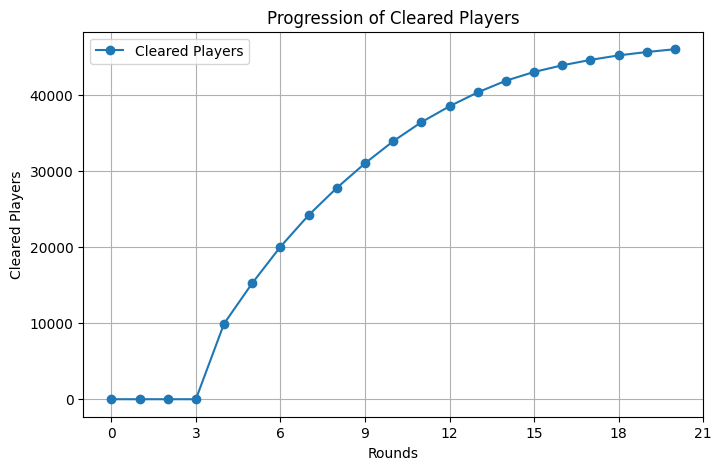

Total rounds: 21
Average battles per player: 7.44


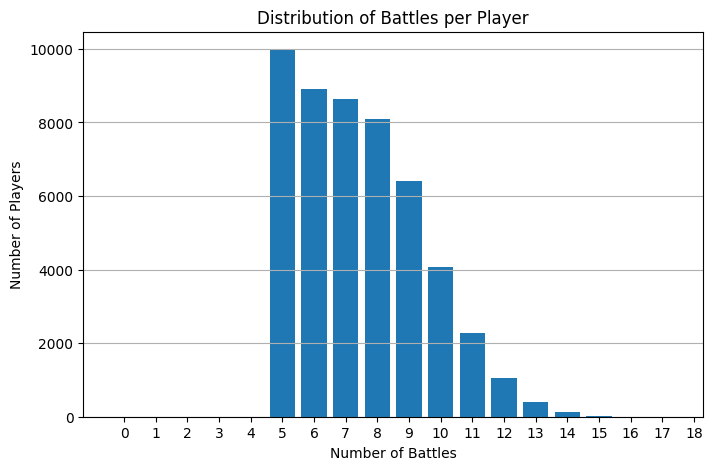

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter

# Constants
NUM_PLAYERS = 50000
WIN_CONDITION = 5
BETRAYAL_RATE = 0.1

# Function to simulate a single round
def simulate_round(players: np.ndarray, player_battles: np.ndarray, betrayal_rate: float) -> int:
    battles = 0
    indices = np.arange(len(players))  # Array of player indices
    np.random.shuffle(indices)  # Shuffle players for random pairing

    for i in range(0, len(indices) - 1, 2):  # Pair players
        player_i, player_j = indices[i], indices[i + 1]

        # Skip if both players are already cleared
        if players[player_i, 1] and players[player_j, 1]:
            continue

        # Automatically handle cleared player's forfeit
        if players[player_i, 1]:
            players[player_j, 0] = min(players[player_j, 0] + 1, WIN_CONDITION)
            continue
        if players[player_j, 1]:
            players[player_i, 0] = min(players[player_i, 0] + 1, WIN_CONDITION)
            continue

        # Battle logic
        if players[player_i, 0] == players[player_j, 0] or random.random() < BETRAYAL_RATE:
            # Fair battle or betrayal
            winner = random.choice([player_i, player_j])
            players[winner, 0] = min(players[winner, 0] + 1, WIN_CONDITION)
        else:
            # Unequal wins: stronger wins
            if players[player_i, 0] > players[player_j, 0]:
                players[player_i, 0] = min(players[player_i, 0] + 1, WIN_CONDITION)
            else:
                players[player_j, 0] = min(players[player_j, 0] + 1, WIN_CONDITION)

        # Count the battle (exclude forfeits)
        player_battles[player_i] += 1
        player_battles[player_j] += 1

        # Update cleared status
        if players[player_i, 0] >= WIN_CONDITION:
            players[player_i, 1] = 1
        if players[player_j, 0] >= WIN_CONDITION:
            players[player_j, 1] = 1

        battles += 1

    return battles

# Simulation setup
players = np.zeros((NUM_PLAYERS, 2), dtype=int)  # [wins, cleared]
player_battles = np.zeros(NUM_PLAYERS, dtype=int)  # Count battles per player
rounds = 0
cleared_count = []

while np.sum(players[:, 0] >= WIN_CONDITION) < NUM_PLAYERS:
    simulate_round(players, player_battles, BETRAYAL_RATE)
    rounds += 1
    cleared_count.append(np.sum(players[:, 1]))

    # Summarize and print progress
    win_counts = Counter(players[:, 0])
    print(f"Round {rounds}:")
    for wins, count in sorted(win_counts.items()):
        print(f"  {count} players with {wins} wins")
    print("-" * 30)

# Ensure flags are consistent after simulation
for i in range(NUM_PLAYERS):
    if players[i, 0] >= WIN_CONDITION:
        players[i, 1] = 1

# Calculate total battles per player (average)
total_battles_per_player = np.sum(player_battles) / NUM_PLAYERS

# Plot progression of cleared players
plt.figure(figsize=(8, 5))
plt.plot(cleared_count, marker='o', label="Cleared Players")
plt.xlabel("Rounds")
plt.ylabel("Cleared Players")
plt.title("Progression of Cleared Players")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Force x-axis to show integers
plt.legend()
plt.grid()
plt.show()

print(f"Total rounds: {rounds}")
print(f"Average battles per player: {total_battles_per_player:.2f}")

# Print individual battle counts
# print("\nBattle Counts per Player:")
# for i in range(NUM_PLAYERS):
    # print(f"  Player {i + 1}: {player_battles[i]} battles")

# Plot histogram of battle counts per player
plt.figure(figsize=(8, 5))
plt.hist(player_battles, bins=range(0, max(player_battles) + 2), align='left', rwidth=0.8)
plt.xlabel("Number of Battles")
plt.ylabel("Number of Players")
plt.title("Distribution of Battles per Player")
plt.xticks(range(0, max(player_battles) + 2))  # Ensure integer ticks
plt.grid(axis='y')
plt.show()


In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Constants
NUM_PLAYERS = 500
WIN_CONDITION = 5
BETRAYAL_RATE = 0.1

# Simulation setup
players = np.zeros((NUM_PLAYERS, 2), dtype=int)  # [wins, cleared]
player_battles = np.zeros(NUM_PLAYERS, dtype=int)  # Count battles per player
history = []

while np.sum(players[:, 0] >= WIN_CONDITION) < NUM_PLAYERS:
    simulate_round(players, player_battles, BETRAYAL_RATE)
    history.append(players[:, 0].copy())  # Store current wins

# Animation setup
fig, ax = plt.subplots(figsize=(10, 6))
x_positions = np.arange(NUM_PLAYERS)  # Fixed x positions for players
scatter = ax.scatter(x_positions, [0] * NUM_PLAYERS, c=[0] * NUM_PLAYERS, cmap="viridis", s=200)

ax.set_xlim(-1, NUM_PLAYERS)
ax.set_ylim(0, WIN_CONDITION + 1)
ax.set_xlabel("Players")
ax.set_ylabel("Wins")
ax.set_title("Player Wins Progression")

# Initialize animation
def init():
    scatter.set_offsets(np.column_stack((x_positions, [0] * NUM_PLAYERS)))
    scatter.set_array(np.zeros(NUM_PLAYERS))
    return scatter,

# Update animation frame
def update(frame):
    y = history[frame]
    scatter.set_offsets(np.column_stack((x_positions, y)))
    scatter.set_array(y)
    return scatter,

# Save the animation as a GIF
ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=False, repeat=False)
output_path = "/content/drive/MyDrive/pokepoke_visualize/player_wins_progression.gif"
ani.save(output_path, writer=PillowWriter(fps=2))
plt.close()

output_path


'/content/drive/MyDrive/pokepoke_visualize/player_wins_progression.gif'

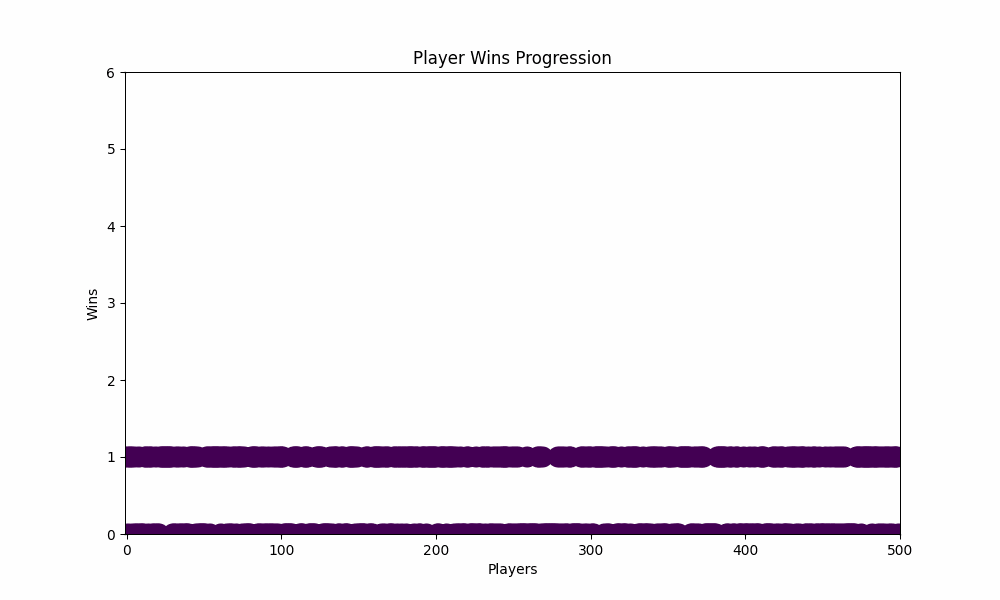

In [32]:
from IPython.display import Image

# GIFファイルのパス
gif_path = "/content/drive/MyDrive/pokepoke_visualize/player_wins_progression.gif"

# GIFを表示
Image(filename=gif_path)
